Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2293 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab/Melanoma Detection/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Colab/Melanoma Detection/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2293
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True
)

Found 2293 files belonging to 9 classes.
Using 1835 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True
)

Found 2293 files belonging to 9 classes.
Using 458 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

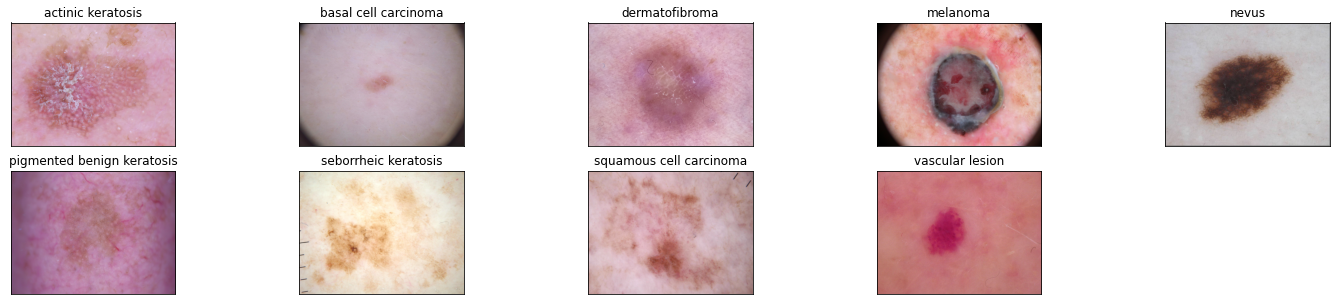

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
num_classes = len(class_names)

fig = plt.figure(figsize=(25,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    im = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', input_shape = (180, 180, 32)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dense(512,kernel_regularizer=l2(0.01)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      25632     
                                                                 
 activation_1 (Activation)   (None, 176, 176, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                        

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
58/58 [==============================] - 336s 2s/step - loss: 2.0526 - accuracy: 0.2093 - val_loss: 2.0320 - val_accuracy: 0.1790
Epoch 2/20
58/58 [==============================] - 5s 81ms/step - loss: 2.0223 - accuracy: 0.1973 - val_loss: 2.0366 - val_accuracy: 0.1288
Epoch 3/20
58/58 [==============================] - 5s 81ms/step - loss: 2.0205 - accuracy: 0.1858 - val_loss: 2.0255 - val_accuracy: 0.2074
Epoch 4/20
58/58 [==============================] - 5s 82ms/step - loss: 2.0132 - accuracy: 0.2180 - val_loss: 2.0110 - val_accuracy: 0.2074
Epoch 5/20
58/58 [==============================] - 5s 82ms/step - loss: 2.0083 - accuracy: 0.2425 - val_loss: 1.9980 - val_accuracy: 0.2664
Epoch 6/20
58/58 [==============================] - 5s 82ms/step - loss: 1.9527 - accuracy: 0.2632 - val_loss: 1.9993 - val_accuracy: 0.2664
Epoch 7/20
58/58 [==============================] - 5s 83ms/step - loss: 1.9057 - accuracy: 0.2916 - val_loss: 1.9496 - val_accuracy: 0.2926
Epoch 8/20
58

### Visualizing training results

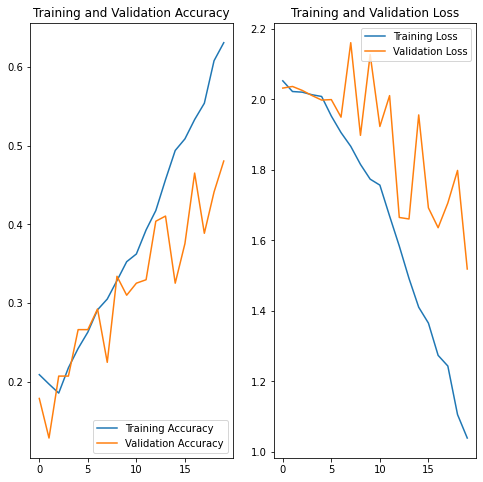

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [18]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

15/15 [==============================] - 0s 26ms/step - loss: 1.5187 - accuracy: 0.4803
Accuracy 0.6871934533119202
loss 0.9273503422737122
val_accuracy 0.4803493320941925
val_loss 1.5187350511550903


- The Loss difference is significant.
- There's a significant difference between the train and validation accuracy.
-Since the model performed really well with train data but not so well with validation data, this is clearly an overfit model.


In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
  layers.RandomRotation(0.2,fill_mode='reflect'),
  layers.RandomContrast(0.5, seed=None),
  layers.RandomZoom((0.2, 0.3),width_factor=(0.2, 0.3), fill_mode='reflect')
])

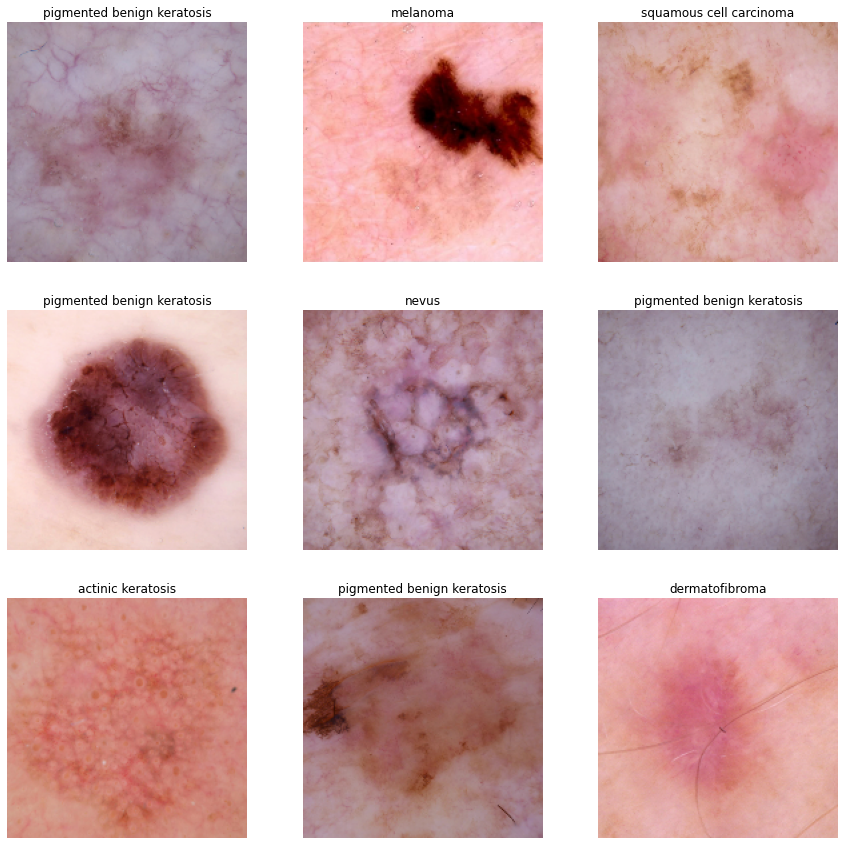

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', input_shape = (180, 180, 32)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dense(512,kernel_regularizer=l2(0.01)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


### Compiling the model

In [22]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
58/58 [==============================] - 7s 89ms/step - loss: 2.0542 - accuracy: 0.1984 - val_loss: 2.0210 - val_accuracy: 0.1834
Epoch 2/20
58/58 [==============================] - 5s 86ms/step - loss: 1.9974 - accuracy: 0.2327 - val_loss: 1.9240 - val_accuracy: 0.3144
Epoch 3/20
58/58 [==============================] - 5s 86ms/step - loss: 1.9540 - accuracy: 0.2779 - val_loss: 1.9179 - val_accuracy: 0.3100
Epoch 4/20
58/58 [==============================] - 5s 87ms/step - loss: 1.7751 - accuracy: 0.3531 - val_loss: 1.6534 - val_accuracy: 0.4039
Epoch 5/20
58/58 [==============================] - 5s 87ms/step - loss: 1.5821 - accuracy: 0.4534 - val_loss: 1.6455 - val_accuracy: 0.4127
Epoch 6/20
58/58 [==============================] - 5s 87ms/step - loss: 1.6229 - accuracy: 0.4267 - val_loss: 1.5512 - val_accuracy: 0.4454
Epoch 7/20
58/58 [==============================] - 5s 87ms/step - loss: 1.5720 - accuracy: 0.4469 - val_loss: 1.5365 - val_accuracy: 0.4520
Epoch 8/20
58

### Visualizing the results

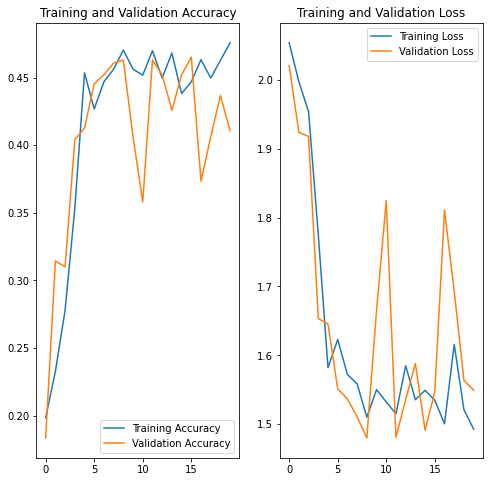

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [25]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

15/15 [==============================] - 0s 27ms/step - loss: 1.5491 - accuracy: 0.4105
Accuracy 0.4392370581626892
loss 1.54417085647583
val_accuracy 0.4104803502559662
val_loss 1.5491416454315186


- There is some reduction in the accuracy
- But Data augentation has solved the problem of overfitting
- Accuracy has reduced which can be increased by increasing number of epochs.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
df_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
1,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
2,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
3,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
4,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
...,...,...
2288,/content/drive/MyDrive/Colab/Melanoma Detectio...,vascular lesion
2289,/content/drive/MyDrive/Colab/Melanoma Detectio...,vascular lesion
2290,/content/drive/MyDrive/Colab/Melanoma Detectio...,vascular lesion
2291,/content/drive/MyDrive/Colab/Melanoma Detectio...,vascular lesion


<BarContainer object of 9 artists>

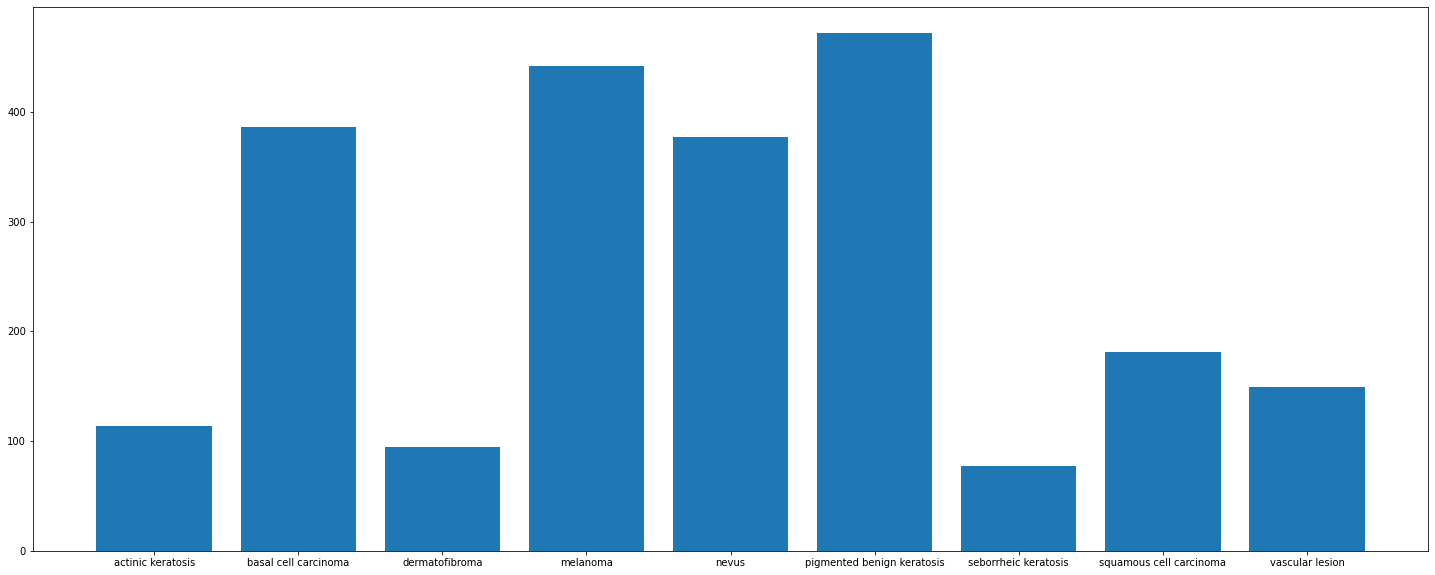

In [27]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- Seborrheic Keratosis has the least number of samples.

#### - Which classes dominate the data in terms proportionate number of samples?
- Melanoma and Pigmented benign keratosis classes dominate the data.

Actinic keratosis and Dermatofibroma have proportionate number of classes.


In [29]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset="/content/drive/MyDrive/Colab/Melanoma Detection/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset, save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9AD1921250>: 100%|██████████| 500/500 [00:49<00:00, 10.08 Samples/s]


Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9AD3806C10>: 100%|██████████| 500/500 [00:44<00:00, 11.19 Samples/s]


Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=771x750 at 0x7F9AD19343D0>: 100%|██████████| 500/500 [00:48<00:00, 10.37 Samples/s]


Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9AD380B850>: 100%|██████████| 500/500 [00:42<00:00, 11.90 Samples/s]


Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9AD373DCD0>: 100%|██████████| 500/500 [00:48<00:00, 10.32 Samples/s]


Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9AD3896250>: 100%|██████████| 500/500 [00:48<00:00, 10.23 Samples/s]


Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9AD1C92AD0>: 100%|██████████| 500/500 [00:38<00:00, 13.01 Samples/s]


Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9AD38690D0>: 100%|██████████| 500/500 [00:38<00:00, 12.95 Samples/s]


Initialised with 2293 image(s) found.
Output directory set to /content/drive/MyDrive/Colab/Melanoma Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9AD1CA13D0>: 100%|██████████| 500/500 [00:46<00:00, 10.74 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab/Melanoma Detection/Train/output")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [34]:
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
1,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
2,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
3,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
4,/content/drive/MyDrive/Colab/Melanoma Detectio...,actinic keratosis
...,...,...
2288,/content/drive/MyDrive/Colab/Melanoma Detectio...,vascular lesion
2289,/content/drive/MyDrive/Colab/Melanoma Detectio...,vascular lesion
2290,/content/drive/MyDrive/Colab/Melanoma Detectio...,vascular lesion
2291,/content/drive/MyDrive/Colab/Melanoma Detectio...,vascular lesion


In [35]:
new_df['Label'].value_counts()

pigmented benign keratosis    472
melanoma                      442
basal cell carcinoma          386
nevus                         377
squamous cell carcinoma       181
vascular lesion               149
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [37]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_dir_train="/content/drive/MyDrive/Colab/Melanoma Detection/Train/output"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [46]:
## your code goes here
model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', input_shape = (180, 180, 32)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(124, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(124, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dense(512,kernel_regularizer=l2(0.01)))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [47]:
## your code goes here
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [48]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 23s 181ms/step - loss: 2.8479 - accuracy: 0.3653 - val_loss: 3.4049 - val_accuracy: 0.1600
Epoch 2/30
113/113 [==============================] - 21s 180ms/step - loss: 2.3038 - accuracy: 0.4022 - val_loss: 3.5101 - val_accuracy: 0.1244
Epoch 3/30
113/113 [==============================] - 21s 177ms/step - loss: 2.0889 - accuracy: 0.4419 - val_loss: 2.7974 - val_accuracy: 0.2544
Epoch 4/30
113/113 [==============================] - 21s 175ms/step - loss: 2.5746 - accuracy: 0.4158 - val_loss: 2.7828 - val_accuracy: 0.2200
Epoch 5/30
113/113 [==============================] - 21s 176ms/step - loss: 2.6316 - accuracy: 0.4292 - val_loss: 90.6329 - val_accuracy: 0.1922
Epoch 6/30
113/113 [==============================] - 21s 174ms/step - loss: 2.4946 - accuracy: 0.4400 - val_loss: 799.0546 - val_accuracy: 0.1967
Epoch 7/30
113/113 [==============================] - 21s 173ms/step - loss: 2.2033 - accuracy: 0.4542 - val_loss: 7.7185 - val

#### **Todo:**  Visualize the model results

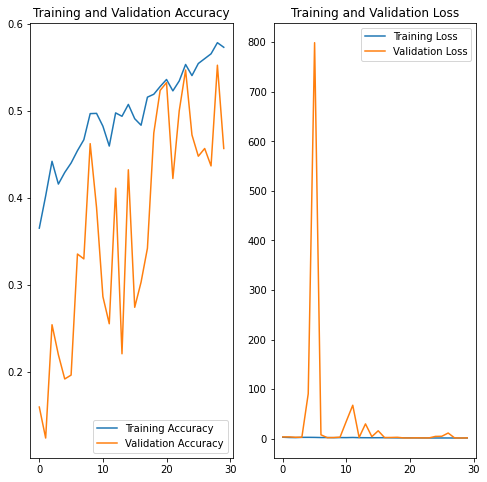

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [50]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

29/29 [==============================] - 4s 92ms/step - loss: 1.5373 - accuracy: 0.4567
Accuracy 0.4772222340106964
loss 1.4551289081573486
val_accuracy 0.4566666781902313
val_loss 1.5372568368911743


- Accuracy on training data has increased by using Augmentor library

- Model is underfit.
- The problem of overfitting can be solved by add more layer,neurons or removing dropout layers.

- The Model can be further improved by tuning the hyperparameter